# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('KDC 교육용 DATASET_공개.xlsx')
data.set_index('ID', inplace=True)
data.head()

,SEX,AGE,JOB,EDUCATION,MARRIAGE,DRINK,SMOKE,CHARACTER1,CHARACTER2,CHARACTER3,...,BODYMEAS_8HAND6,BODYMEAS_8HAND7,BODYMEAS_8HAND8,SYSTOLICBP,DIASTOLICBP,GLUCOSE,T_CHOL,TG,HDL_CHOL,LDL_CHOL
ID,,,,,,,,,,,,,,,,,,,,,
KDCT00001,2,48.666,2,5,2,999,999,2,2,1,...,82.0,91.0,96.0,120,80,104,219,72,60,128
KDCT00002,2,80.773,14,3,2,999,999,1,1,1,...,92.0,96.0,99.0,124,65,110,199,97,46,114
KDCT00003,1,50.008,3,3,2,999,999,3,1,1,...,80.0,81.0,81.0,121,75,79,216,88,49,132
KDCT00004,2,50.551,14,4,2,999,999,1,1,1,...,91.0,94.0,99.0,113,81,100,218,136,44,136
KDCT00005,1,49.581,8,2,2,999,999,3,2,3,...,98.0,98.0,100.0,129,72,92,186,61,33,118


In [2]:
X_data = data.replace([888,999], np.nan)
X_data.isnull().sum().sort_values(ascending=False)[:20]

DRINK          474
SMOKE          474
STOOL12_7      233
STOOL12_8      233
DIET4           79
DIET7           26
HDL_CHOL         3
LDL_CHOL         3
GLUCOSE          3
T_CHOL           3
TG               3
SWEAT3           2
CHARACTER7       1
HEALTH1          1
COLDHEAT_G       1
CHARACTER8       1
COLDHEAT_S       1
WATER1           1
CHARACTER15      0
SWEAT1           0
dtype: int64

In [3]:
X_data['SLEEP'] = X_data['SLEEP3_1'] + X_data['SLEEP3_2'] / 60

In [4]:
X_data = X_data.drop(['DRINK', 'SMOKE', 'STOOL12_7', 'STOOL12_8', 'DIET4', 'SLEEP3_1', 'SLEEP3_2'], axis=1)
X_data

,SEX,AGE,JOB,EDUCATION,MARRIAGE,CHARACTER1,CHARACTER2,CHARACTER3,CHARACTER4,CHARACTER5,...,BODYMEAS_8HAND7,BODYMEAS_8HAND8,SYSTOLICBP,DIASTOLICBP,GLUCOSE,T_CHOL,TG,HDL_CHOL,LDL_CHOL,SLEEP
ID,,,,,,,,,,,,,,,,,,,,,
KDCT00001,2,48.666,2,5,2,2,2,1,2,1,...,91.0,96.0,120,80,104.0,219.0,72.0,60.0,128.0,5.0
KDCT00002,2,80.773,14,3,2,1,1,1,1,1,...,96.0,99.0,124,65,110.0,199.0,97.0,46.0,114.0,5.0
KDCT00003,1,50.008,3,3,2,3,1,1,1,1,...,81.0,81.0,121,75,79.0,216.0,88.0,49.0,132.0,7.0
KDCT00004,2,50.551,14,4,2,1,1,1,1,1,...,94.0,99.0,113,81,100.0,218.0,136.0,44.0,136.0,7.0
KDCT00005,1,49.581,8,2,2,3,2,3,2,2,...,98.0,100.0,129,72,92.0,186.0,61.0,33.0,118.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KDCT00496,1,50.682,3,5,2,3,1,2,2,1,...,80.0,88.0,120,80,71.0,190.0,75.0,73.0,101.0,7.0
KDCT00497,2,42.542,3,5,2,3,1,3,3,1,...,76.0,79.0,110,70,74.0,246.0,86.0,104.0,117.0,6.0
KDCT00498,1,48.797,7,5,2,3,2,2,2,2,...,96.5,97.5,150,100,125.0,246.0,220.0,74.0,154.0,6.0


In [5]:
X_data.dropna(axis=0, inplace=True)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
final_diagnosis = X_data.pop('FINALDIAGNOSIS')
ordinal_encoder.fit(np.array(final_diagnosis).reshape(-1,1))
print(ordinal_encoder.categories_)

y_data = ordinal_encoder.transform(np.array(final_diagnosis).reshape(-1,1)).reshape(-1,)
print(y_data[:10])

[array([1, 2, 3])]
[1. 2. 1. 1. 0. 2. 0. 1. 1. 0.]


## Numerical Variable processing

In [7]:
num_var_list = ['AGE','URINE2', 'COLDHEAT_S', 'HEIGHT', 'WEIGHT', 'BMI', 
                'BODYMEAS_8HAND1', 'BODYMEAS_8HAND2', 'BODYMEAS_8HAND3', 'BODYMEAS_8HAND4', 'BODYMEAS_8HAND5', 'BODYMEAS_8HAND6', 'BODYMEAS_8HAND7', 'BODYMEAS_8HAND8',
                'SYSTOLICBP', 'DIASTOLICBP', 'GLUCOSE', 'T_CHOL', 'TG', 'HDL_CHOL', 'LDL_CHOL', 
                'HEALTH1', 'SLEEP']
X_num = X_data.reindex(columns = num_var_list)
X_num.head()

,AGE,URINE2,COLDHEAT_S,HEIGHT,WEIGHT,BMI,BODYMEAS_8HAND1,BODYMEAS_8HAND2,BODYMEAS_8HAND3,BODYMEAS_8HAND4,...,BODYMEAS_8HAND8,SYSTOLICBP,DIASTOLICBP,GLUCOSE,T_CHOL,TG,HDL_CHOL,LDL_CHOL,HEALTH1,SLEEP
ID,,,,,,,,,,,,,,,,,,,,,
KDCT00001,48.666,1.0,12.0,158.0,55.0,22.0,53.0,33.0,92.0,96.0,...,96.0,120,80,104.0,219.0,72.0,60.0,128.0,3.0,5.0
KDCT00002,80.773,1.0,13.0,155.0,63.0,26.2,59.0,35.0,96.0,101.0,...,99.0,124,65,110.0,199.0,97.0,46.0,114.0,3.0,5.0
KDCT00003,50.008,1.0,12.0,160.0,59.0,23.0,57.0,37.0,95.0,90.0,...,81.0,121,75,79.0,216.0,88.0,49.0,132.0,3.0,7.0
KDCT00004,50.551,1.0,15.0,165.0,76.0,27.9,59.0,37.0,100.0,104.0,...,99.0,113,81,100.0,218.0,136.0,44.0,136.0,4.0,7.0
KDCT00005,49.581,0.0,11.0,165.0,70.0,25.7,60.0,40.0,106.0,102.0,...,100.0,129,72,92.0,186.0,61.0,33.0,118.0,2.0,5.0


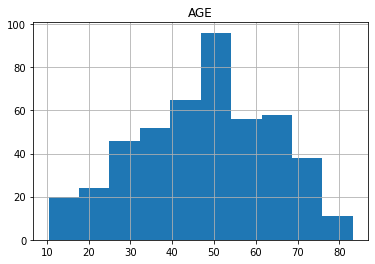

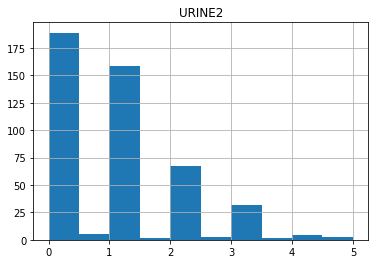

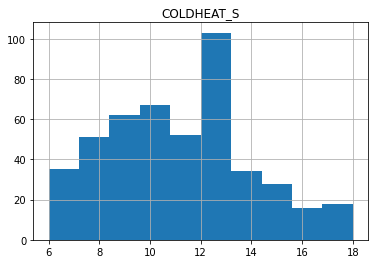

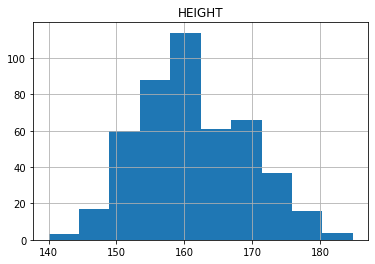

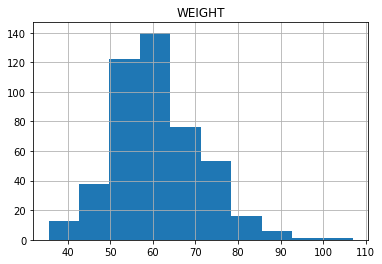

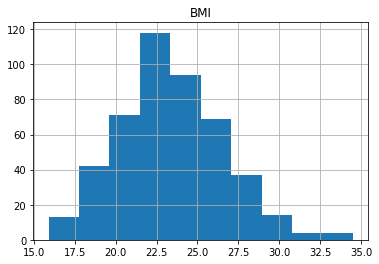

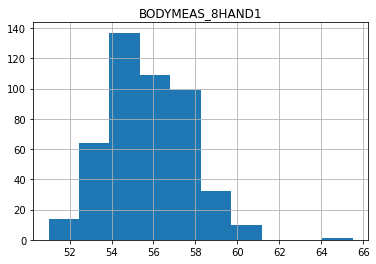

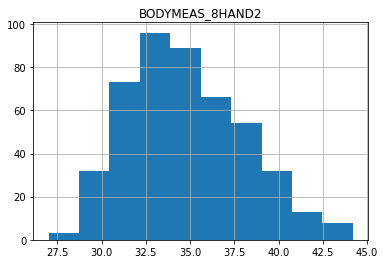

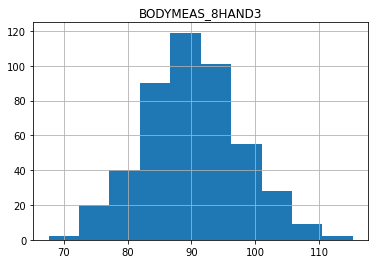

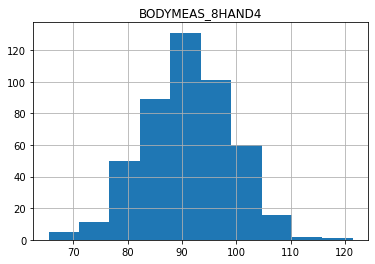

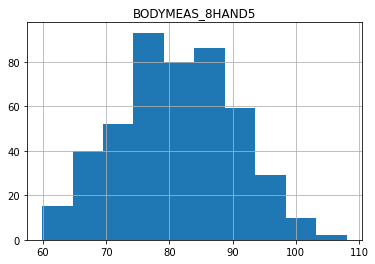

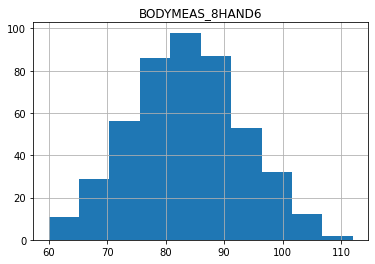

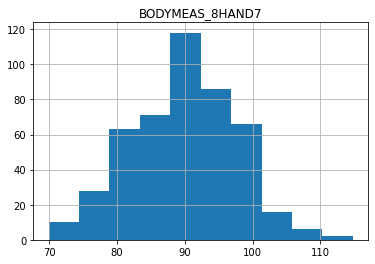

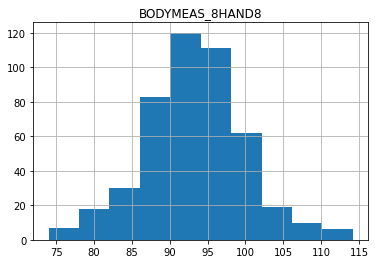

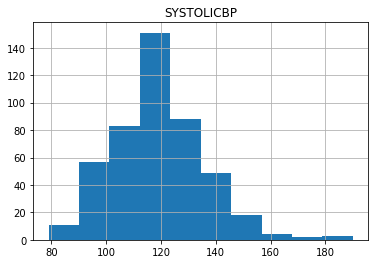

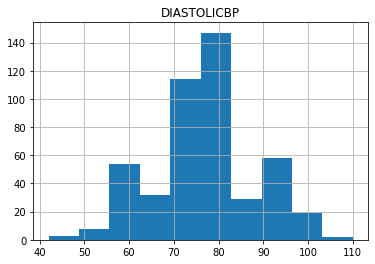

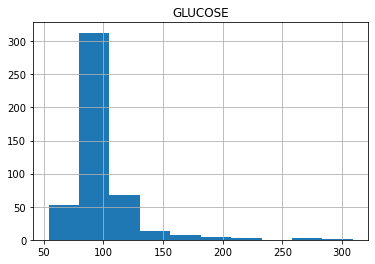

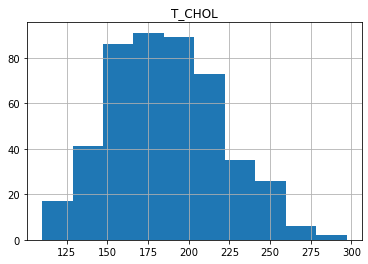

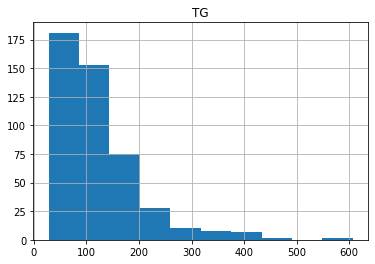

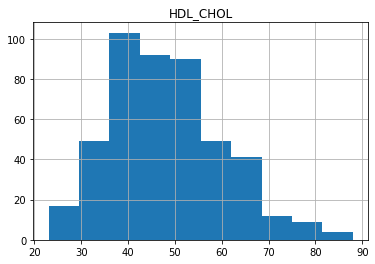

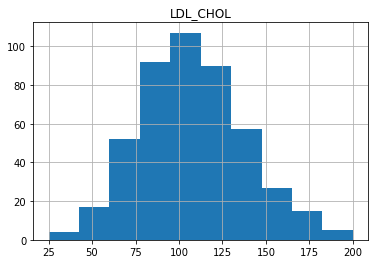

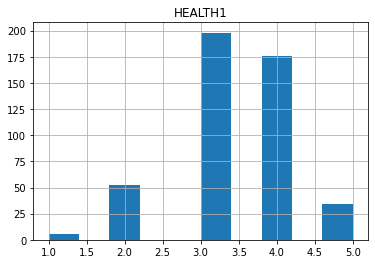

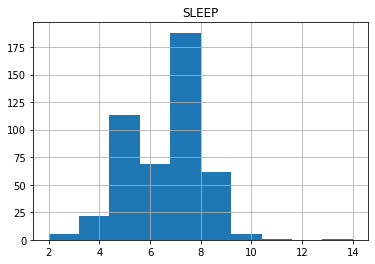

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

for column in X_num.columns:
    X_num[column].hist()
    plt.title(column)
    plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(X_num)
X_num_scaled = X_minmax_scaler.transform(X_num)
X_num_scaled

array([[0.52540906, 0.2       , 0.5       , ..., 0.58857143, 0.5       ,
        0.25      ],
       [0.96650593, 0.2       , 0.58333333, ..., 0.50857143, 0.5       ,
        0.25      ],
       [0.54384591, 0.2       , 0.5       , ..., 0.61142857, 0.5       ,
        0.41666667],
       ...,
       [0.37974144, 0.2       , 0.58333333, ..., 0.50857143, 1.        ,
        0.25      ],
       [0.01780489, 0.        , 0.66666667, ..., 0.54285714, 0.5       ,
        0.54166667],
       [0.09662174, 0.        , 0.75      , ..., 0.28      , 0.25      ,
        0.375     ]])

In [10]:
numeric_data_df = pd.DataFrame(X_num_scaled, columns=X_num.columns)
numeric_data_df.head()

,AGE,URINE2,COLDHEAT_S,HEIGHT,WEIGHT,BMI,BODYMEAS_8HAND1,BODYMEAS_8HAND2,BODYMEAS_8HAND3,BODYMEAS_8HAND4,...,BODYMEAS_8HAND8,SYSTOLICBP,DIASTOLICBP,GLUCOSE,T_CHOL,TG,HDL_CHOL,LDL_CHOL,HEALTH1,SLEEP
0,0.525409,0.2,0.500000,0.401786,0.272727,0.327957,0.137931,0.348837,0.511530,0.545455,...,0.547264,0.369369,0.558824,0.196078,0.582888,0.075993,0.569231,0.588571,0.50,0.250000
1,0.966506,0.2,0.583333,0.334821,0.384615,0.553763,0.551724,0.465116,0.595388,0.634581,...,0.621891,0.405405,0.338235,0.219608,0.475936,0.119171,0.353846,0.508571,0.50,0.250000
2,0.543846,0.2,0.500000,0.446429,0.328671,0.381720,0.413793,0.581395,0.574423,0.438503,...,0.174129,0.378378,0.485294,0.098039,0.566845,0.103627,0.400000,0.611429,0.50,0.416667
3,0.551306,0.2,0.750000,0.558036,0.566434,0.645161,0.551724,0.581395,0.679245,0.688057,...,0.621891,0.306306,0.573529,0.180392,0.577540,0.186528,0.323077,0.634286,0.75,0.416667
4,0.537980,0.0,0.416667,0.558036,0.482517,0.526882,0.620690,0.755814,0.805031,0.652406,...,0.646766,0.450450,0.441176,0.149020,0.406417,0.056995,0.153846,0.531429,0.25,0.250000


## Categorical Variable processing

### binary

In [11]:
binary_var_list = ['SEX','STOOL1', 'HYPER1', 'DIABE1', 'HYPERLI1', 
                   'FATIGUE2_1', 'FATIGUE2_2', 'FATIGUE2_3', 'FATIGUE2_4', 'FATIGUE2_5']
X_binary = X_data.reindex(columns=binary_var_list)

In [12]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(drop='first')
binary_encoder.fit(X_binary)
X_binary_matrix = binary_encoder.transform(X_binary)
print(binary_encoder.categories_)
print(X_binary_matrix.toarray().shape)

[array([1, 2]), array([1, 2]), array([1, 2]), array([1, 2]), array([1, 2]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1])]
(466, 10)


In [13]:
X_cat_binary_df = pd.DataFrame(X_binary_matrix.toarray(), columns=X_binary.columns)
X_cat_binary_df.head()

,SEX,STOOL1,HYPER1,DIABE1,HYPERLI1,FATIGUE2_1,FATIGUE2_2,FATIGUE2_3,FATIGUE2_4,FATIGUE2_5
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### multi

In [14]:
from sklearn.preprocessing import OneHotEncoder

multi_var_list = ['JOB', 'EDUCATION', 'MARRIAGE',
                  'CHARACTER1', 'CHARACTER2', 'CHARACTER3', 'CHARACTER4', 'CHARACTER5',
                  'CHARACTER6', 'CHARACTER7', 'CHARACTER8', 'CHARACTER9', 'CHARACTER10',
                  'CHARACTER11', 'CHARACTER12', 'CHARACTER13', 'CHARACTER14', 'CHARACTER15',
                  'DIET7', 'DIGEST1',
                  'DIGEST3', 'SWEAT1', 'SWEAT3', 'STOOL7', 'COLDHEAT1', 'COLDHEAT2',
                  'COLDHEAT3', 'COLDHEAT4', 'WATER1', 'WATER3', 'COLDHEAT_G', 'FATIGUE1']
X_multi = X_data.reindex(columns=multi_var_list)

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_multi)
onehot_matrix = onehot_encoder.transform(X_multi)
print(onehot_encoder.categories_)
print(onehot_matrix.toarray().shape)

[array([ 1,  2,  3,  4,  5,  6,  7,  8, 14]), array([1, 2, 3, 4, 5, 6]), array([1, 2, 3, 4]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1., 2., 3.]), array([1., 2., 3.]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1., 2., 3.]), array([1, 2, 3]), array([1, 2, 3, 4]), array([1, 2, 3]), array([1., 2., 3.]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1., 2., 3., 4.]), array([1, 2, 3]), array([1., 2., 3.]), array([1, 2, 3, 4])]
(466, 109)


In [15]:
X_cat_multi_df = pd.DataFrame(onehot_matrix.toarray())
X_cat_multi_df.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Concatenate Numerical and Categorical Variables

In [16]:
X_data_df = pd.concat([numeric_data_df, X_cat_binary_df, X_cat_multi_df], axis=1)
X_data_df

,AGE,URINE2,COLDHEAT_S,HEIGHT,WEIGHT,BMI,BODYMEAS_8HAND1,BODYMEAS_8HAND2,BODYMEAS_8HAND3,BODYMEAS_8HAND4,...,99,100,101,102,103,104,105,106,107,108
0,0.525409,0.2,0.500000,0.401786,0.272727,0.327957,0.137931,0.348837,0.511530,0.545455,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.966506,0.2,0.583333,0.334821,0.384615,0.553763,0.551724,0.465116,0.595388,0.634581,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.543846,0.2,0.500000,0.446429,0.328671,0.381720,0.413793,0.581395,0.574423,0.438503,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.551306,0.2,0.750000,0.558036,0.566434,0.645161,0.551724,0.581395,0.679245,0.688057,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.537980,0.0,0.416667,0.558036,0.482517,0.526882,0.620690,0.755814,0.805031,0.652406,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,0.805561,0.5,0.333333,0.370536,0.267133,0.344086,0.034483,0.145349,0.431866,0.491979,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
462,0.801261,0.2,0.500000,0.417411,0.302098,0.365591,0.172414,0.290698,0.490566,0.465241,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
463,0.379741,0.2,0.583333,0.383929,0.418182,0.569892,0.193103,0.372093,0.459119,0.474153,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
464,0.017805,0.0,0.666667,0.212054,0.000000,0.000000,0.068966,0.000000,0.039832,0.024955,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
X_data = np.array(X_data_df)

print(X_data.shape, y_data.shape)

(466, 142) (466,)


## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2,
                                                    stratify=y_data,
                                                    random_state=12345)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(372, 142) (372,)
(94, 142) (94,)


# Modeling

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

dt = DecisionTreeClassifier(random_state=1234)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [20]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[0. 2. 0. 0. 2. 0. 2. 0. 2. 2.]


In [21]:
accuracy_score(y_test, dt_pred)

0.4574468085106383

In [22]:
f1_score(y_test, dt_pred, average='macro')

0.448190870551119

## RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300, max_features = 'sqrt', 
                           random_state = 1234)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=300, random_state=1234)

In [24]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[0. 2. 0. 0. 2. 0. 0. 0. 2. 0.]


In [25]:
accuracy_score(y_test, rf_pred)

0.6170212765957447

In [26]:
f1_score(y_test, rf_pred, average='macro')

0.5783599269667382

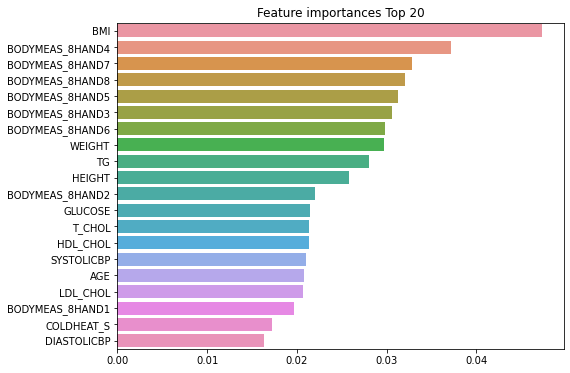

In [27]:
import seaborn as sns

importances_values = rf.feature_importances_
importances = pd.Series(importances_values, index=X_data_df.columns)

top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## SVM

In [28]:
from sklearn.svm import SVC

svm = SVC(C=3, kernel='poly', probability=True)
svm.fit(X_train, y_train)

SVC(C=3, kernel='poly', probability=True)

In [29]:
svm_pred = svm.predict(X_test)
print(svm_pred[:10])

[0. 2. 0. 0. 2. 1. 2. 0. 2. 0.]


In [30]:
accuracy_score(y_test, svm_pred)

0.5531914893617021

In [32]:
f1_score(y_test, svm_pred, average='macro')

0.5727329580988118

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [32]:
lr_pred = lr.predict(X_test)
print(lr_pred[:10])

[0. 2. 0. 0. 2. 1. 0. 0. 2. 0.]


In [33]:
accuracy_score(y_test, lr_pred)

0.5425531914893617

In [34]:
f1_score(y_test, lr_pred, average='macro')

0.525785278949836

## GBM

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=1000, max_depth=8, random_state=1234)
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
print(gbm_pred[:10])

[0. 2. 0. 0. 2. 0. 1. 0. 2. 2.]


In [36]:
accuracy_score(y_test, gbm_pred)

0.5106382978723404

In [37]:
f1_score(y_test, gbm_pred, average='macro')

0.48810051736881005

## AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 300, learning_rate = 0.1, random_state=1000)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
print(ada_pred[:10])

[0. 2. 0. 0. 2. 0. 2. 0. 2. 0.]


In [39]:
accuracy_score(y_test, ada_pred)

0.5319148936170213

In [40]:
f1_score(y_test, ada_pred, average='macro')

0.5094079629290897

## XGBoost

In [41]:
import xgboost as xgb
print(xgb.__version__)

xgb_clf = xgb.XGBClassifier(learning_rate=0.05, max_depth=15, n_estimators=1000,
                            use_label_encoder=False)
xgb_clf.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_clf.predict(X_test)
print(xgb_pred[:10])

1.3.3
[21:13:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 2 0 0 2 0 2 0 2 0]


In [42]:
accuracy_score(y_test, xgb_pred)

0.574468085106383

In [43]:
f1_score(y_test, xgb_pred, average='macro')

0.5650947579203317

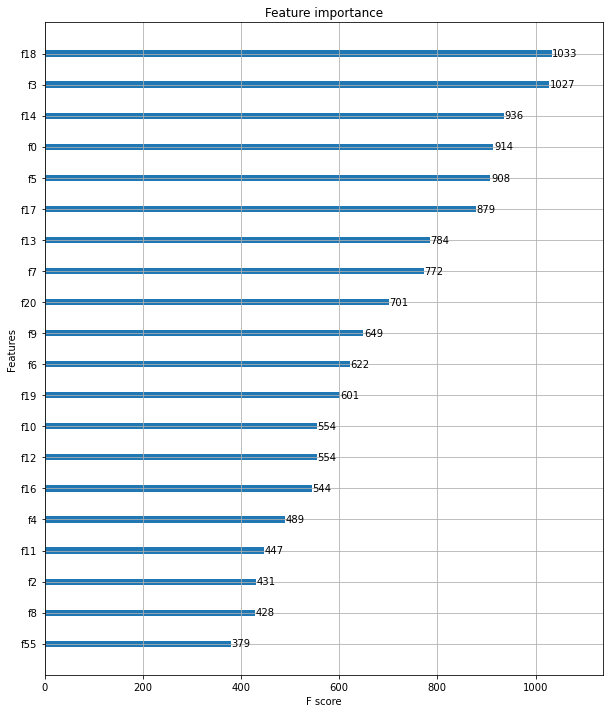

In [44]:
from xgboost import plot_importance

plot_importance(xgb_clf, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [45]:
import lightgbm as lgb


lgb_clf = lgb.LGBMClassifier(n_estimators=1000, max_depth=8)
lgb_clf.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=1000,
        verbose = False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMClassifier(max_depth=8, n_estimators=1000)

In [46]:
lgb_pred = lgb_clf.predict(X_test)
print(lgb_pred[:10])

[0. 2. 0. 0. 2. 0. 0. 0. 2. 0.]


In [47]:
accuracy_score(y_test, lgb_pred)

0.6170212765957447

In [48]:
f1_score(y_test, lgb_pred, average='macro')

0.6035228461806766

# Ensemble

In [49]:
import torch
from sklearn.metrics import accuracy_score

class EnsembleClassifier:
    def __init__(self, models, voting='soft', weights=None):
        
        self.models = models
        self.voting = voting
        self.weights = weights
        
    def predict(self, X_test): 
        pred_list = []
        for model in models.values():
            pred_list.append(model.predict_proba(X_test))
        preds = np.array(pred_list)
        
        if self.voting == 'soft':
            prediction = np.average(preds, axis=0, weights=self.weights)
        elif self.voting == 'hard':
            pass
        
        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        pred_list = []
        for model in models.values():
            pred_list.append(model.predict_proba(X_test))
        preds = np.array(pred_list)
              
        acc = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            acc_ = accuracy_score(y_test, prediction.argmax(axis=1))
            acc.append(acc_)
            
        result = pd.DataFrame(weights)
        result['Accuracy'] = acc

        return result.sort_values('Accuracy', ascending=False)

In [50]:
models = {'RandomForest' : rf, 'SVM' : svm, 'XGBoost' : xgb_clf, 'LightGBM' : lgb_clf}

ensemble = EnsembleClassifier(models, voting='soft', weights=None)
result = ensemble.random_search(X_test, y_test, 30000)
result

,0,1,2,3,Accuracy
17036,0.360851,0.362078,0.141439,0.135632,0.638298
18180,0.396171,0.162371,0.172955,0.268504,0.627660
25133,0.325958,0.355088,0.154134,0.164820,0.627660
6421,0.386114,0.168014,0.223927,0.221946,0.627660
14273,0.394565,0.163042,0.196511,0.245882,0.627660
...,...,...,...,...,...
546,0.300897,0.187629,0.373242,0.138232,0.574468
273,0.310990,0.174039,0.359647,0.155324,0.574468
9212,0.343574,0.177228,0.344088,0.135110,0.574468
8518,0.338183,0.180516,0.328014,0.153288,0.574468


In [51]:
optimal_weight = np.round(result.iloc[0,:-1], 3).tolist()
print(optimal_weight)

[0.361, 0.362, 0.141, 0.136]


In [52]:
ensemble = EnsembleClassifier(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[[0.69297775 0.09420864 0.21281361]
 [0.24639461 0.19672584 0.55687955]
 [0.76849412 0.08178704 0.14971883]
 [0.54212145 0.18987273 0.26800582]
 [0.16121837 0.15748298 0.68129866]
 [0.60044942 0.20397003 0.19558055]
 [0.38585191 0.17798609 0.43616199]
 [0.66042481 0.05020081 0.28937438]
 [0.24082225 0.22793157 0.53124617]
 [0.77584689 0.06030166 0.16385145]]


In [53]:
accuracy = accuracy_score(y_test, preds.argmax(axis=1))
f1 = f1_score(y_test, preds.argmax(axis=1), average='macro')
print('앙상블 모델 정확도: {:.4f}'.format(accuracy))
print('앙상블 모델 F1-score: {:.4f}'.format(f1))

앙상블 모델 정확도: 0.6383
앙상블 모델 F1-score: 0.6216
